# **MA2151 Simulasi dan Komputasi Matematika**
## **Seleksi Asisten Praktikum**


## Teknis Pengerjaan
1. Buat salinan dari *notebook* ini ke Google Drive anda, dan *rename* berkas menjadi `asprak_sikomat_NIM.ipynb`.
2. Kumpulkan hasil pekerjaan anda (dalam format .ipynb dan sesuai dengan format dokumen ini) ke LINE Afif (mafifapip) sebelum **Sabtu, 15 Agustus 2020, jam 11:59 WIB**. Harap menuliskan seluruh pekerjaan Anda dalam berkas yang Anda kirimkan.
3. Beberapa parameter yang akan digunakan dalam penilaian ini adalah:
  * Tingkat kesuksesan.
  * Kompleksitas waktu dan/atau kode.
  * Keterbacaan (termasuk komentar)
  * Argumen matematika
  * Kekreatifan (terutama untuk nomor 6)

    
*Mengingat tim penseleksi bukan cenayang digital, sebaiknya Anda memberikan komentar di program yang Anda buat. Walaupun tidak dipaksakan, menulis mengikuti gaya penulisan Python (misal [PEP 8](https://www.python.org/dev/peps/pep-0008/)) lebih baik.*


### 1. Rekursi Sederhana

**Catatan**: Untuk menghayati soal ini, disarankan menyetel lagu berikut: https://www.youtube.com/watch?v=FFYAZ9KxWnI dan https://www.youtube.com/watch?v=fwGuv2vmoVg . Tentunya, tidak ada konsekuensi (nilai plus ataupun minus) yang Anda dapatkan jikalau Anda menyetel, atau tidak menyetel lagu tersebut - saya hanya ingin berbagi rekomendasi saja.

Definisikan barisan $a_i$ sebagai berikut: $a_1=a_2=1$ dan $\dfrac{1}{a_{n+2}}=\dfrac{1}{a_{n+1}}+\dfrac{1}{a_n}$ untuk semua $n$ bilangan bulat positif. Lengkapilah fungsi `ratio(i)` yang dapat menentukan, dengan ketepatan 10 digit di belakang koma, nilai $\dfrac{a_{i+1}}{a_{i}}$, untuk $1\leq i \leq 10000$.


In [4]:
## Anda juga dapat menulis kode di sini.

def memoize(func):
    """Store results of the decorated function for fast lookup"""
    cache = {}
    def wrapper (*args):
        if (args) not in cache:
            cache[(args)] = func(*args)
        return cache[(args)]
    return wrapper

@memoize
def ratio_memo(i):
    """
    Menghitung hasil a_{i+1}/a{i} secara rekursif menggunakan bantuan memoisasi.
    Hasil cukup tidak terduga, kadang cepat kadang tidak.
    Args:
        i : int
            menyatakan bilangan ke-berapa yang akan ditampilkan
    Returns:
        float
            bilangan ke-i
    """
    return 1 if i <=2 else 1/(1 + ratio_memo(i-1))

def ratio_matrix(i):
    """
    Menghitung deret Fibonacci secara eksplisit menggunakan eksponensiasi matrix ([1, 1],[1, 0]).
    Baru menghitung rasio dari angka2 yang didapatkan. Kompleksitas O(log(i)) - lebih cepat dari rekursi.
        Args:
        i : int
            menyatakan bilangan ke-berapa yang akan ditampilkan
    Returns:
        float
            bilangan ke-i
    """
    def mat_mult_2x2(A, B):
        """
        Fungsi untuk melakukan perkalian matriks 2x2.
        Args
        ====
            A, B : list of int with length 4.
                Menyatakan isi matriks, berturut a11, a12, a21, a22.
        Returns
        =======
            list of int with length 4.
                Hasil perkalian matriks.
        """
        return [A[0]*B[0]+A[1]*B[2], A[0]*B[1]+A[1]*B[3], A[2]*B[0]+A[3]*B[2], A[2]*B[1]+A[3]*B[3]]


    def mat_exp(C, n):
        """
        Memangkatkan matriks sejauh n. Pemangkatan dilakukan dengan metode eksponensiasi biner.
        Args:
            n : int
        Returns:
            list of int with length 4.
                A**n.
        """
        if n == 1:
            return C
        elif n % 2:
            return mat_mult_2x2(C, mat_exp(C, n-1))
        D = mat_exp(C, n//2)
        return mat_mult_2x2(D, D)

    if i <= 2:
        return 1
    else:
        f_n_pl_1, f_n, _, _ = mat_exp([1, 1, 1, 0], i-1)
        return f_n/f_n_pl_1

def ratio(i, method='matrix'):
    methods = {
        'matrix' : ratio_matrix,
        'memo'   : ratio_memo
    }
    return methods[method](i)

In [8]:
ratio(3)

0.5

### 2. Selamat Datang di Omonib

**Catatan**: Untuk menghayati soal ini, disarankan menyetel lagu berikut: https://www.youtube.com/watch?v=b8ztR3KXR0g

Halo nama saya Dibu Setiawan, saya seorang treder profesyonal... lupakan saja.

Saya sekarang sedang mencoba membuat (para praktikan membuat) animasi pergerakan saham (seperti di iklan omonib yang dulu viral), namun sialnya saya hanya dapat menggunakan Python untuk dapat melakukan hal ini. Bisabantu saya?

**Catatan**: Saham yang dimodelkan TIDAK diambil dari data saham di dunia nyata  -  melainkan  dimodelkan  secara  matematis.   Jelaskan  secara  singkat pemodelan yang dipakai dalam jawaban Anda.



In [3]:
## Tulis module yang anda perlukan di sini, jika ada.

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [12]:
def gen_pure_randwalk(len=260, drift=1, sigma=1):
    """
    Generates a pure random walk for data, with starting point 1, and standard deviation 1 unless specified.
    A random walk motion has zero mean and is i.i.d for all points.
    Args
    ----
    len: int
        The length desired for data. Default value 260 (representing 260 days - 5 days a week, 52 weeks a year - annual)
    drift: int
        Defines the initial value desired for data.
    sigma: float
        The standard deviation desired for the random walk.

    Returns
    -------
        data:
            a NumPy array, containing values for random walk.
    """
    np.random.seed(np.random.randint(101108))
    data = np.empty(len)
    data[0] = drift
    for i in range(1, len):
        data[i] = data[i-1] + np.random.randn()*sigma
        if data[i] <= 0:
            data[i] = data[i-1]
    return data


def init():
    """Membersihkan figure sebagai best practice menggunakan FuncAnimation."""
    _ = l.set_xdata([])
    _ = l.set_ydata([])
    return l,


def update_line(num, data, line):
    """
    Fungsi untuk membangun plot baru di frame yang baru.
    Pada kasus ini saya hanya mengeset data yang ditampilkan objek Line2D (nama line, tanda koma perlu saat mengubah data sebab line adalah list.)
    """
    _ = line.set_xdata(np.arange(num))
    _ = line.set_ydata(data[:num])
    return line,

fig, ax = plt.subplots()

data = gen_pure_randwalk(len=1000, drift=5, sigma=0.1)
l, = ax.plot([], [], 'b-')

_ = ax.set_title("A Random Walk Down Wall Street")
_ = ax.set_xlim((0, 1000))
_ = ax.set_ylim((0, np.max(data)+10))
_ = ax.set_xlabel("Days since IPO")
_ = ax.set_ylabel("Closing Price")

anim = animation.FuncAnimation(
    fig, update_line, 1000, fargs=(data, l), interval=5, blit=True, init_func=init)
print("Animation object created successfully!\nUse cell below to import as mp4 file.\nUse the cell below that to display in Jupyter Notebooks.")

In [ ]:
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=60, metadata=dict(artist='Ian Sebastian'), bitrate=1800)
anim.save("randwalk.mp4", writer=writer)
print("Video import done.")

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
HTML(anim.to_jshtml())

### 3. Kenangan di Pinggir Sungai

Pandemi memang menyebalkan. Kelas saya libur, kelas adik saya libur.
Kami pun membuat permainan baru guna mengisi waktu luang tanpa bertemu teman-teman sepantaran kami.

Pertama, saya mengambil $n$ buah batu dari sungai, dan meletakkan mereka di halaman belakang rumah.
Saya dan adik saya secara bergiliran mengambil $1,2,3,\dotsc$ atau $m$ buah batu
(dengan saya selalu melangkah pertama kali). Pemain yang menghabiskan batu memenangkan permainan tersebut,
dan pemain yang kalah harus mengembalikan bebatuan tersebut ke pinggir sungai.

Sebagai contoh, misal $n=10$, $m=4$. Permainan berlangsung sebagai berikut

```
Banyak batu untuk bermain: 10
Maksimum batu yang boleh diambil: 4

Saya mengambil 2 batu. Sisa batu: 8
Adik mengambil 3 batu. Sisa batu: 5
Saya mengambil 1 batu. Sisa batu: 4
Adik mengambil 4 batu. Sisa batu: 0

Adik menang.
```

Eh, salah, kok adik saya yang menang. Coba saya ulangi lagi permainannya.
```
Banyak batu untuk bermain: 10
Maksimum batu yang boleh diambil: 4

Saya mengambil 4 batu. Sisa batu: 6
Adik mengambil 3 batu. Sisa batu: 3
Saya mengambil 3 batu. Sisa batu: 0

Saya menang.
```

Suatu hari, adik saya sedang tidak ingin memainkan permainan ini. Mengingat revolusi industri 4.0 membuat makin banyak pekerjaan digantikan AI, saya memutuskan untuk membuat suatu program Python sederhana untuk menggantikan peran adik saya di permainan ini. Tentunya, program ini tidak perlu mengangkat batu ke kali jikalau ia kalah.

1. Lengkapilah fungsi `game()` berikut, yang mensimulasikan permainan di atas. Karena sifat permainan ini interaktif, tokoh "**saya**" perlu memasukkan input banyak batu yang ia ambil di setiap giliran. Gunakan contoh permainan di atas sebagai tampilan permainan (boleh tidak persis).

  Asumsikan program memilih banyak batu yang diambil dengan peluang uniform. Akan tetapi, jika suatu saat batu yang tersisa di giliran program kurang dari $m$,  program  mengambil  semua  batu  di  gilirannya  (untuk memastikan program menang).

In [10]:
import random

def game():
    """Simulasi permainan di pinggir sungai."""

    N = int(input("Banyak batu untuk bermain: "))
    M = int(input("Maksimum batu yang boleh diambil: "))
    print()

    curr_rocks = N
    gil_saya = True

    while curr_rocks > 0:
        if gil_saya:
            amt = ''
            while not amt.isdigit():
                amt = input("Giliran Anda! Jumlah batu yang akan Anda ambil: ")
                if not amt.isdigit() or int(amt)>M or int(amt)<1:
                    print("Input tidak valid! Ulangi atau temui pesan ini terus.")
                    amt = ''
            amt = int(amt)
        else:
            if curr_rocks <= M:
                amt = curr_rocks
            else:
                amt = random.randint(1, M)

        curr_rocks -= amt
        print("{} mengambil {} batu. Sisa batu: {}".format("Saya" if gil_saya else "Adik", amt, curr_rocks))
        gil_saya = not gil_saya

    print("\n{} menang.".format("Adik" if gil_saya else "Saya"))

2. Setelah lama memainkan permainan yang telah saya buat sebelumnya bersama adik saya, saya menemukan hal berikut: kalau $m+1$ habis membagi $n$, adik saya selalu memenangkan permainan ini - tak peduli bagaimanapun saya melangkah.

  Dengan memodifikasi program Python yang dibuat sebelumnya, jika $m+1|n$, lengkapi fungsi `game_v2()` yang mengimitasi strategi kemenangan adik saya. Tentunya, di kasus ini program *tidak* memilih secara acak banyak batu yang diambil.
  

In [19]:
import random

def game_v2():
    """Simulasi permainan di pinggir sungai."""

    N = int(input("Banyak batu untuk bermain: "))
    M = int(input("Maksimum batu yang boleh diambil: "))
    print()
  
    curr_rocks = N
    gil_saya = True

    while curr_rocks > 0:
        if gil_saya:
            amt = ''
            while not amt.isdigit():
                amt = input("Giliran Anda! Jumlah batu yang akan Anda ambil: ")
                if not amt.isdigit() or int(amt) > M or int(amt) > curr_rocks:
                    print("Input tidak valid! Ulangi atau temui pesan ini terus.")
                    amt = ''
            amt = int(amt)
        else:
            if curr_rocks <= M:
                amt = curr_rocks
            else:
                amt = curr_rocks % (M+1)

        curr_rocks -= amt
        print("{} mengambil {} batu. Sisa batu: {}".format("Saya" if gil_saya else "Adik", amt, curr_rocks))
        gil_saya = not gil_saya

    print("\n{} menang.".format("Adik" if gil_saya else "Saya"))

In [20]:
game_v2()


Saya mengambil 4 batu. Sisa batu: 16
Adik mengambil 1 batu. Sisa batu: 15
Saya mengambil 2 batu. Sisa batu: 13
Adik mengambil 3 batu. Sisa batu: 10
Saya mengambil 1 batu. Sisa batu: 9
Adik mengambil 4 batu. Sisa batu: 5
Input tidak valid! Ulangi atau temui pesan ini terus.
Saya mengambil 3 batu. Sisa batu: 2
Adik mengambil 2 batu. Sisa batu: 0

Adik menang.


3. Apa yang terjadi jika $m+1$ tak habis membagi $n$?

Misal $n$ habis dibagi $m+k$, dimana $0 \leq k \leq m-1, \, k \neq 1$. Maka pada giliran pertama,
saya akan mengambil $p$ buah batu, dimana

$n \equiv p \, (mod\;m+1),$

Maka, adik akan menjalankan gilirannya dengan jumlah batu tersisa yang habis dibagi $m+1$. Karena kita telah
mengetahui bahwa akibat ini, saya punya strategi yang pasti memenangkan saya. (dengan selalu mengambil sejumlah $q$,
dimana $q$ adalah sisa pembagian jlh batu sekarang dengan $m+1$. Alhasil, yang terakhir mengambil batu pasti saya.)
Maka itu, saya akan selalu menang.

### 4. Labirin yang Hidup

**Catatan**: Untuk menghayati soal ini, disarankan menyetel lagu berikut selagi mencoba menyelesaikan masalah yang ada. https://www.youtube.com/watch?v=Lr_nyEruW4g

Tiba tiba, anda terbangun. Anda berada di sebuah labirin besar!

![Oh tidak!](https://res.cloudinary.com/jerrick/image/upload/fl_progressive,q_auto,w_1024/q6hgjkv5yy4ilmgzpa1p.jpg)


Setelah menghabiskan beberapa minggu berkelana dan bertahan hidup, anda menemukan beberapa keanehan dengan tempat ini. *Labirin ini hidup*. Dinding-dindingnya muncul dan hilang, bergerak kesana dan kemari. Terkadang dinding labirin ini hampir membunuh diri anda.

Bagaimanapun, ada rasa bersyukur bisa tetap hidup sampai saat ini.

Suatu hari, setelah mencari makanan, anda menemukan ruangan kecil di pinggir suatu dinding labirin. Penasaran, anda mencoba masuk... pintunya tidak terkunci. Di pojok ruangan, ada komputer menyala, dengan *wallpaper* bertuliskan "TES-SKMT". Entah apa artinya itu. Lalu anda melihat ada file Python berikut. "Sepertinya ini penting", lalu anda me-*run* program ini. 

In [13]:
## Kode ini akan mendownload file `maze.txt`
## di storage session notebook ini. Legenda:
##  0 = Dinding
##  1 = Pagar
##  2 = Jalan

import requests


data = requests.get("https://raw.githubusercontent.com/"
                    "kekavigi/materi-tutor/master/TES/maze.txt").text
with open("maze.txt", "w") as f: f.write(data)
del data

In [14]:
maze = np.loadtxt("maze.txt", dtype=str)
maze = np.array([[int(elem) for elem in row] for row in maze])
maze

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 2, 2, ..., 2, 2, 1],
       [1, 0, 0, ..., 0, 2, 1],
       ...,
       [1, 2, 0, ..., 0, 0, 1],
       [1, 2, 0, ..., 2, 2, 1],
       [1, 1, 1, ..., 1, 1, 1]])

1. Ada firasat bahwa file `maze.txt` berisi peta labirin ini. Well, tidak ada salahnya mencoba membuktikan firasat. Bisakah anda membuat visualisasi peta dari file `maze.txt`?

Oiya, selagi anda mencoba, tolong warnai:
0. Dinding dengan warna hitam
1. Pagar dengan warna biru, dan
2. Jalan dengan warna putih.

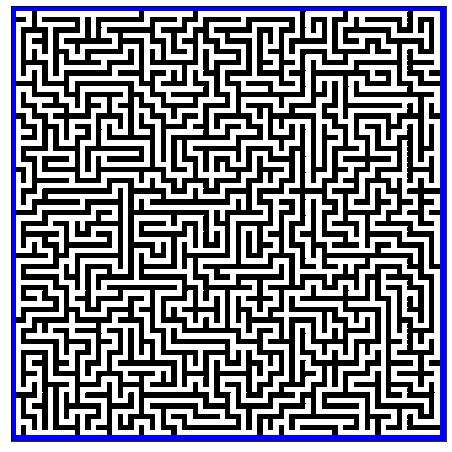

In [22]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["black", "blue", "white"])

fig, ax = plt.subplots(figsize=(8,8))
_ = ax.pcolormesh(maze, cmap=cmap)

_ = plt.gca().invert_yaxis()
_ = plt.xticks([])
_ = plt.yticks([])
_ = ax.set_aspect(1)
plt.show()

2. "Hah! Apa arti peta ini?!" Mata anda melolot melihat pagar di tepi labirin di peta, "Tidak mungkin, tidak ada jalan keluar dari labirin ini".

  Lebih sial, anda tidak dapat memastikan di mana posisi anda di dalam peta (tapi apa gunanya, toh labirin ini *hidup*). Bagaimana pun juga anda ingin keluar dari labirin ini, itu pasti. Ada ide cemerlang terlintas dipikiran:

  > "*Kalau saya berlari bisa ke pagar labirin, saya bisa mencoba memanjatnya dan keluar!*"

  Tapi, apakah semua jalan di labirin saat ini, pasti menuju ke pagar labirin? Buatlah program yang mewarnai semua jalan yang terhubung ke pagar labirin dengan warna kuning.

In [17]:
maze2 = maze.copy()

In [20]:
import numpy as np
# Cara: bruteforce sampai konvergen

flag = True
while flag:
    mazeold = maze2.copy()

    for i in range(1, 81):
        for j in range(1, 81):
            if maze2[i, j] == 2:
                if (np.append(maze2[i-1:i+2, j], maze2[i, j-1:j+2]) == 1).any() or \
                        (np.append(maze2[i-1:i+2, j], maze2[i, j-1:j+2]) == 3).any():
                    maze2[i, j] = 3

    flag = (mazeold != maze2).any()
    del mazeold



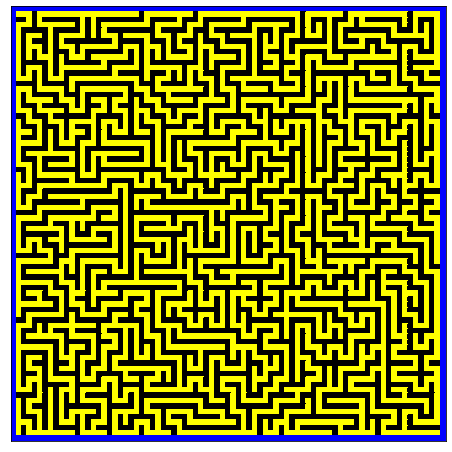

In [21]:
cmap = ListedColormap(["black", "blue", "white", "yellow"])

fig, ax = plt.subplots(figsize=(8,8))
_ = ax.pcolormesh(maze2, cmap=cmap)

_ = plt.gca().invert_yaxis()
_ = plt.xticks([])
_ = plt.yticks([])
_ = ax.set_aspect(1)
plt.show()

### 5. Selamat Datang di Taman Sikomat

**Catatan**: Untuk menghayati soal ini, disarankan menyetel lagu berikut: https://www.youtube.com/watch?v=Zk9iH-nunro

Banyak hal yang bisa Anda lakukan selagi menunggu kembalinya Anda ke bangku perkuliahan (daring). Salah satu contoh paling efektif adalah tidur sembari membayangkan Anda memecahkan permasalahan TA Anda. Tentunya hal ini memiliki efek samping selepas Anda bangun.

Suatu siang (setelah melewatkan kelas jam 7 pagi karena Anda bangun jam 9), Anda mengkaji ulang materi Sikomat demi melancarkan Anda di tes seleksi calon asisten. Anda membaca materi dinamika populasi, dan mengingat kembali persamaan Lotka-Volterra untuk memodelkan dua hewan - sebutlah Pemangsa dan Dimangsa.

Anda membaca dalam hati, lalu menemukan beberapa asumsi yang "tidak realistis" dari persamaan tersebut. Sebagai seorang ca-matematikawan (atau aktuaris, atau data analis, atau semacamnya), Anda penasaran hal yang akan terjadi jika asumsi tersebut dihilangkan.

Untuk soal di bawah, gunakan data berikut:
- Populasi pemangsa awal adalah 20, dengan konstanta laju kelahiran dan kematian (dalam model Lotka-Volterra biasa) adalah 0.02 dan 1.02.
- Populasi dimangsa awal adalah 200, dengan konstanta laju kelahiran dan kematian (dalam model Lotka-Volterra biasa) adalah 2.04 dan 0.04.

0. Buatlah program Python yang memodelkan (dengan memakai persamaan beda) simulasi persamaan Lotka-Volterra terhadap data di atas. Simulasikan pula grafik populasi Pemangsa dan Dimangsa dalam *scatter-plot* dan *deret waktu* 


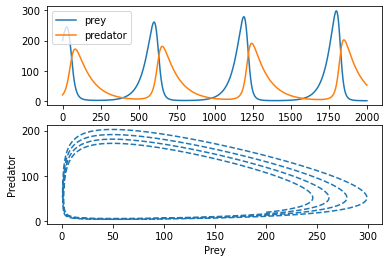

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def lotka_vol(x0=200, y0=20, alpha=2.04, beta=0.04, gamma=1.02, delta=0.02, reps=200):
    x = np.empty(reps)
    y = np.empty(reps)
    x[0] = x0
    y[0] = y0
    for i in range(1, reps):
        x[i] = x[i-1] + 0.01*(alpha*x[i-1] - beta*x[i-1]*y[i-1])
        y[i] = y[i-1] + 0.01*(delta*x[i-1]*y[i-1] - gamma*y[i-1])
    return x, y


prey, predator = lotka_vol(reps = 2000)

fig, ax = plt.subplots(nrows=2)

_ = ax[0].plot(prey, label="prey")
_ = ax[0].plot(predator, label="predator")
_ = ax[0].legend()

_ = ax[1].plot(prey, predator, linestyle = '--')
_ = ax[1].set_xlabel("Prey")
_ = ax[1].set_ylabel("Predator")
_ = plt.show()

1. "Asumsikan fungsi pertumbuhan hewan tanpa predasi mengikuti fungsi eksponensial." Sebentar... setelah memikirkan ulang, hal ini jelas tidak logis. Jadi apa yang perlu Anda lakukan?
Dengan mengasumsikan fungsi pertumbuhan hewan mengikuti fungsi logistik (atau fungsi pertumbuhan populasi lain yang menurut Anda lebih masuk akal),  berikan sistem persamaan baru yang memodelkan populasi Pemangsa dan Dimangsa. 

Oh ya, kalian tahu kan kalau Collab mendukung $\LaTeX$?



(tuliskan jawaban nomor 5.1 di sini)


2. Perbaiki program Anda di bagian sebelumnya dengan persamaan baru yang Anda buat. Tentunya (atau mungkin sialnya?), konstanta lsju kematian dan perubahan kedua hewan perlu Anda ubah. Jika Anda tidak bisa mendapatkan nilai konstanta yang baru, tidak apa-apa - gunakan saja konstanta laju yang lama. (poin plus akan diberikan jika Anda berhasil mendapatkan konstanta baru.)

In [ ]:
#Soal nomor 5.2

### 6. Bunga Terakhir

**Catatan**: Untuk menghayati soal ini, disarankan menyetel lagu berikut: https://www.youtube.com/watch?v=NBf5P9Qd6cs

Bagaimana perasaan Anda setelah disajikan beberapa permasalahan di atas? (Tentu saja, ini bukan pertanyaan dari soal di bagian ini.)

Sekarang, bayangkan Anda diterima sebagai asisten Sikomat untuk semester ini. Bayangkan Anda membuat soal praktikum untuk dinikmati satu shift Anda.

Dengan menggunakan silabus Sikomat tahun lalu, buatlah setidaknya satu soal (lengkap dengan narasi soal dan jawaban) praktikum Sikomat. Anda bebas memilih bagian silabus yang akan Anda pakai, tapi lampirkan juga bagian yang Anda pakai. Oh ya, kreativitas sangat dicari di soal ini.

Soal nomor 6
Ide:
* Minesweeper Board Generation
* Digit-by-digit Square Root Calculation (With precision points) -- ngakar kuadrat ala anak SD
* Conway's Game of Life. Staple example

<h3>Minesweeper - Cuma Anak 2000an yang Tau</h3>
<h6>Multi-dimensional Array / Matrix, Dasar-dasar Python, Colormap, Random Generation</h6>

Seharusnya kalian sudah tahu deh Minesweeper itu apa. Tau kan? Ya kan??...

Oke, di permainan ini, pemain diberikan papan yang punya m x n kotak tertutup, dan dalam k kotak yang acak, ada bom di dalamnya.
 
Saat pemain membuka kotak, skenario yang bisa terjadi meliputi:
* Kotak tidak berisi bom, tapi di sekitar kotak (daerah 3x3 sekitar kotak) ada k buah bom. Maka isi kotak
  akan ditandai dengan angka k.
* Kotak tidak berisi bom, tidak juga sekitarnya. Aman...paling tidak disekitar 3x3 itu.
* Kotak berisi bom, yang kemudian terpicu, sehingga meledak dan membunuhmu, mengakhiri permainan.

Tujuan permainan ini adalah untuk membuka semua kotak yang tidak berisi bom.

Namun... jangan khawatir! Tentu kami nggak berniat meminta kalian
membuat game ini dengan keterbatasan2 yang kita hadapi -- seperti coding cuma pake
Google Colab. Kami hanya ingin melihat sebuah papan Minesweeper yang dimensi dan jumlah bomnya bisa ditentukan.
Patut diperhatikan bahwa:
* Bom terdistribusi acak, dan
* Jumlah bom pasti lebih sedikit dari jumlah kotak di lapangan.

Outputnya berupa sebuah NumPy array berukuran m x n, dimana nilainya adalah:
* 0-9 : jumlah bom disekitar
* -1  : bom!

Buatlah sebuah papan 10 x 10 yang berisi 15 bom!

Bonus: tampilkanlah lapangan Minesweeper yang kalian buat, dengan hanya menampilkan kotak berangka sebagai warna yang lain dari background, dan dengan menampilkan angka.
Gunakanlah fungsi plot seaborn.heatmap() untuk membantu Anda. 

In [ ]:
def gen_minesweeper_field(size=(10,10), mines=10):
    width, len = size
    while width*len <= mines:
        try:
            mines = int(input("Amount of mines exceeds playing area. Please specify a new amount: "))
        except ValueError:
            print("Board generation failed: Amount of mines specified exceeds playing area.")

    mine = -1

    np.random.seed(np.random.randint(101108))

    field = np.zeros(size)
    for i in range(mines):
        mine_x, mine_y = np.random.randint(width), np.random.randint(len)
        while field[mine_x, mine_y] == mine:
            mine_x, mine_y = np.random.randint(width), np.random.randint(len)
        field[mine_x, mine_y] = mine

    for i in range(width):
        for j in range(len):
            if field[i, j] != mine:
                dbound = i-1 if i >= 1 else i
                ubound = i+2 if i <= width-2 else i+1
                lbound = j-1 if j >= 1 else j
                rbound = j+2 if j <= len-2 else j+1

                neigh = field[dbound:ubound ,lbound:rbound]
                field[i, j] = (neigh == mine).sum()
    return field


In [5]:
minefield = gen_minesweeper_field()
minefield


array([[ 0.,  1., -1.,  1.,  1., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  2.,  3.,  3.,  2.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  1.],
       [ 0.,  2., -1.,  2.,  0.,  1., -1.,  3., -1.,  2.],
       [ 0.,  2., -1.,  2.,  1.,  2.,  2.,  3., -1.,  2.],
       [ 0.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.]])

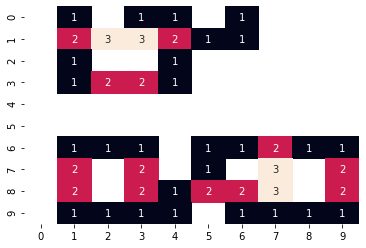

In [12]:
import seaborn as sns
_ = sns.heatmap(minefield, annot=True, mask=minefield<=0, cbar=None)
plt.show()

<h3>Throwback SD : Akar Kuadrat!</h3>
<h6>Bahan : Dasar Pemrograman, Pengulangan</h6>
Ufifa adalah seorang anak gadis jenius kelas 5 SD. 
Ceritanya Ufifa baru diajari di kelas tentang akar kuadrat.
Prosesnya simpel, tapi panjang dan kadang rada njelimet jadi teman-teman Ufifa
suka bingung, tapi Ufifa biasa-biasa saja sih. Karena itu teman-temannya jadi 
nanya terus sama Ufifa buat nyocokin jawaban, tapi lama-lama Ufifa jadi malas
ngerjain satu-persatu, jenuh banget. Kebetulan Ufifa baru saja belajar Python
lewat internet, jadi dia memutuskan buat bikin program yang bisa menghitung jawaban
dan prosedur pencariannya langkah demi langkah.  

<br> Kamu adalah Afifu, orang yang mengklaim sebagai rival terberat Ufifa tapi naksir
dengan dia secara bersamaan. Setelah mendengar bahwa Ufifa berniat membuat program
ini, dorongan hormonal remaja mendorongmu untuk bergegas membuat program yang sama sebelum
Ufifa menyelesaikannya, supaya kamu bisa membantu Ufifa, sekaligus merasakan kemenangan
yang langka atas dia.

<h5>Contoh Input</h5>
<pre><code>
Angka yang akan dicari akarnya: 2
Berapa angka dibelakang koma? 4
</pre></code>

<h5>Contoh Output</h5>
<pre><code>
PROCEDURE
=========
1. 2 - (1 x 1). Hasil sejauh ini: 1
Sudah kena koma.
2. 100 - (24 x 4). Hasil sejauh ini: 1.4
3. 400 - (281 x 1). Hasil sejauh ini: 1.41
4. 11900 - (2824 x 4). Hasil sejauh ini: 1.414
5. 60400 - (28282 x 2). Hasil sejauh ini: 1.4142
6. 383600 - (282841 x 1). Hasil sejauh ini: 1.41421
7. 10075900 - (2828423 x 3). Hasil sejauh ini: 1.414213
8. 159063100 - (28284265 x 5). Hasil sejauh ini: 1.4142135
9. 1764177500 - (282842706 x 6). Hasil sejauh ini: 1.41421356
10. 6712126436 - (2828427122 x 2). Hasil sejauh ini: 1.414213562
11. 105527219283 - (28284271243 x 3). Hasil sejauh ini: 1.4142135623
Hasilnya, akar 2, dengan presisi maksimal 10 angka penting dibelakang koma adalah 1.4142135623.
</code></pre>

<br> Bonus: Program mengetahui bila nilai akar punya jumlah angka dibelakang 0 lebih sedikit dari yang diminta,
dan tidak menampilkan deretan 0 tidak penting di belakang.

<h3>Contoh Bonus Input</h3>
<pre><code>
Angka yang akan dicari akarnya: 6.25
Berapa angka dibelakang koma? 10
</pre></code>
<h3>Contoh Bonus Output</h3>
<pre><code>
PROCEDURE
=========
1. 6 - (2 x 2). Hasil sejauh ini: 2
Sudah kena koma.
2. 225 - (45 x 5). Hasil sejauh ini: 2.5
Sudah sampai nol, menghentikan operasi.
Hasilnya, akar 6.25, dengan presisi maksimal 10 angka penting dibelakang koma adalah 2.5.</pre></code>

<h5>Halaman yang Terkait</h5>
<a href=https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation>Square roots - Digit-by-digit method </a>

In [64]:
def decimal_len(x):
    """Counts the length of a decimal number, i.e. the greatest power of 10 smaller than x."""
    r = 1
    while x >= 10:
        x /= 10
        r += 1
    return r


def decimal_sqrt(p, depth=0):
    """
    Performs a digit-by-digit decimal estimate of the square root of p, down to a specifyied digits behind decimal point.
    :param p: float
        A decimal number whose square root is being estimated.

    :param depth: int
        Number of floating points to calculate.

    :return: float
        Square root estimate of p.
    """
    dlen = decimal_len(p)
    res = 0
    procedure = []
    for i in range ((dlen-1) // 2, -depth-1, -1):
        pos = p / 100**i

        r = 20 * res
        s = 0
        while ((r+s) * s) <= pos:
            s += 1
        s -= 1

        res = 10*res + s
        p -= (r+s)*s * 100**i
        procedure.append((pos, r, s))
    result = str(res)[:dlen] + "." + str(res)[dlen:]
    return result, procedure, dlen


def disp_result(p, depth):

    result, procedure, dlen = decimal_sqrt(p, depth)
    print("PROCEDURE\n"+"="*9)
    blm_lewat_koma = True
    for i in range(len(procedure)):
        pos, r, s = procedure[i]

        if s == 0:
            print("Sudah sampai nol, menghentikan operasi.")
            break

        if i > dlen-1 and blm_lewat_koma:
            blm_lewat_koma = False
            print("Sudah kena koma.")

        result_to_display = result[:i+1] if blm_lewat_koma else result[:i+2]
        print(f"{i+1}. {int(pos)} - ({r + s} x {s}). Hasil sejauh ini: {result_to_display}")
    print(f"Hasilnya, akar {p}, dengan presisi maksimal {depth} angka penting dibelakang koma adalah {result_to_display}.")

    return None

In [69]:
disp_result(6.25, 10)


PROCEDURE
1. 6 - (2 x 2). Hasil sejauh ini: 2
Sudah kena koma.
2. 225 - (45 x 5). Hasil sejauh ini: 2.5
Sudah sampai nol, menghentikan operasi.
Hasilnya, akar 6.25, dengan presisi maksimal 10 angka penting dibelakang koma adalah 2.5.
